### Predict whether a loan will be approveed or not using SVM model.

In [21]:
# import dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [3]:
# load the data
df = pd.read_csv('./loan_dataset.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df.shape

(614, 13)

In [6]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


### Data Preprocessing

In [7]:
# check for null values
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

there isn't large number of null data so we can drop the null rows

In [10]:
df = df.dropna()

In [11]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [15]:
# Label Encoding
# Y - 1 && N - 0
df = df.replace({'Loan_Status':{'Y':1, 'N':0}})
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,1


In [16]:
# dependent column
df.Dependents.value_counts()

0     274
2      85
1      80
3+     41
Name: Dependents, dtype: int64

In [17]:
# replacing 3+ with 4
df = df.replace({'Dependents':{'3+':4}})

In [18]:
df.Dependents.value_counts()

0    274
2     85
1     80
4     41
Name: Dependents, dtype: int64

### Data Visualization

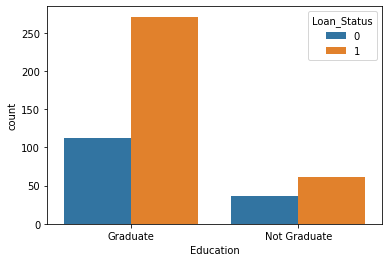

In [22]:
# education vs loan status
sns.countplot(x='Education', hue='Loan_Status', data=df)
plt.show()

A Graduate is more likely to get a loan approved as compared to a Non-Graduate.

[]

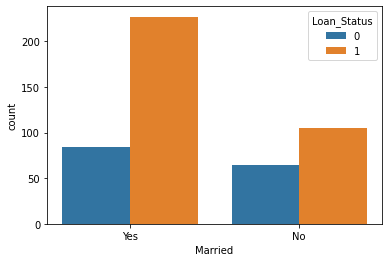

In [23]:
# Married vs loan_status
sns.countplot(x='Married', hue='Loan_Status', data=df)
plt.plot()

A married is more likely to get a loan approved as compared to an unmarried.

[]

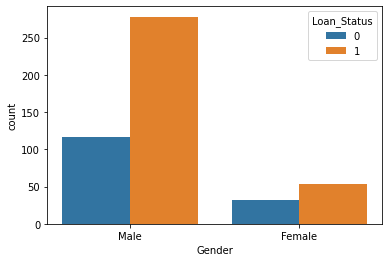

In [24]:
# Gender vs loan_status
sns.countplot(x='Gender', hue='Loan_Status', data=df)
plt.plot()

[]

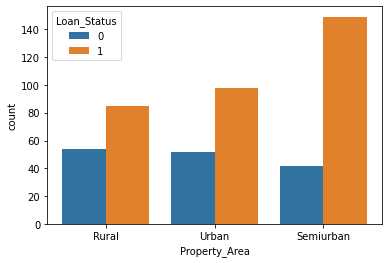

In [25]:
# Property_Area vs loan_status
sns.countplot(x='Property_Area', hue='Loan_Status', data=df)
plt.plot()

### Converting Categorical Columns to Numerical Columns

In [27]:
# replacing all the other categorical column data with numerical values
df = df.replace({'Gender':{'Male':1, 'Female':0}, 'Married':{'Yes':1, 'No':0}, 
                 'Education':{'Graduate':1, 'Not Graduate':0}, 'Self_Employed':{'Yes':1, 'No':0}, 
                'Property_Area':{'Rural':0, 'Semiurban':1, 'Urban':2}})

In [28]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1
5,LP001011,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,2,1


In [31]:
# split data into X and Y
X = df.drop(['Loan_ID','Loan_Status'], axis=1)
Y = df['Loan_Status']

print(X)
print(Y)

     Gender  Married Dependents  Education  Self_Employed  ApplicantIncome  \
1         1        1          1          1              0             4583   
2         1        1          0          1              1             3000   
3         1        1          0          0              0             2583   
4         1        0          0          1              0             6000   
5         1        1          2          1              1             5417   
..      ...      ...        ...        ...            ...              ...   
609       0        0          0          1              0             2900   
610       1        1          4          1              0             4106   
611       1        1          1          1              0             8072   
612       1        1          2          1              0             7583   
613       0        0          0          1              1             4583   

     CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_Hi

In [40]:
# train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.15, stratify=Y, random_state=2)

### SVM Model

In [41]:
# building the model
sv = SVC(kernel='linear')
sv.fit(x_train, y_train)

SVC(kernel='linear')

In [42]:
# training performance
y_train_pred = sv.predict(x_train)
accuracy_score(y_train_pred, y_train)

0.7941176470588235

In [43]:
confusion_matrix(y_train,y_train_pred)

array([[ 47,  79],
       [  5, 277]], dtype=int64)

In [44]:
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.90      0.37      0.53       126
           1       0.78      0.98      0.87       282

    accuracy                           0.79       408
   macro avg       0.84      0.68      0.70       408
weighted avg       0.82      0.79      0.76       408



In [45]:
# test performance
y_pred = sv.predict(x_test)

In [46]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

[[13  9]
 [ 2 48]]
              precision    recall  f1-score   support

           0       0.87      0.59      0.70        22
           1       0.84      0.96      0.90        50

    accuracy                           0.85        72
   macro avg       0.85      0.78      0.80        72
weighted avg       0.85      0.85      0.84        72

0.8472222222222222
